In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgbm

import optuna
from optuna import Trial, visualization

from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import KFold
import torch

In [204]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data_cat = pd.read_csv('train.csv')
test_data_cat = pd.read_csv('test.csv')

In [175]:
def heatmap(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Feature Correlation Heatmap')
    plt.show()

In [205]:
def feature_graph(data, column_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(len(data)), data, alpha=0.8)
    plt.title(f'Distribution of {column_name} in Coordinate Space')
    plt.xlabel('Index')
    plt.ylabel(column_name)
    plt.grid(True)
    plt.show()

In [177]:
def compare_two_column(data1, data2, data1_name, data2_name):
    plt.figure(figsize=(10, 8))
    plt.scatter(data1, data2, c='blue', marker='o')
    plt.title(f'Scatter Plot of {data1_name} & {data2_name}')
    plt.xlabel(f'{data1_name}')
    plt.ylabel(f'{data2_name}')
    plt.grid(True)
    plt.show()

In [ ]:
def plot_func(df, column, target):
    count_df = df.groupby([column, target]).size().unstack(fill_value=0)
    count_df = count_df.div(count_df.sum(axis=1), axis=0)
    count_df.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(8, 4))
    plt.xlabel(f'{column}')
    plt.ylabel('Proportion')
    plt.title(f'Proportion of Target by {column}')
    plt.legend(title='Target', loc='upper right')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i in range(count_df.shape[0]):
        for j in range(count_df.shape[1]):
            plt.text(i, count_df.iloc[i, j] / 2 + count_df.iloc[i, :j].sum(), f"{count_df.iloc[i, j]:.2f}", ha='center', color='black')


plt.show()

In [207]:
for col in train_data.columns :
    cnt = train_data[col].value_counts()
    print(f"{cnt}\n")

ID
TRAIN_40117    1
TRAIN_00000    1
TRAIN_00001    1
TRAIN_00002    1
TRAIN_00003    1
              ..
TRAIN_00025    1
TRAIN_00026    1
TRAIN_00027    1
TRAIN_00028    1
TRAIN_00029    1
Name: count, Length: 40118, dtype: int64

x_0
1.090381    1
1.006187    1
1.024647    1
1.062444    1
1.089189    1
           ..
1.059849    1
0.958394    1
1.053385    1
1.082756    1
0.986546    1
Name: count, Length: 40118, dtype: int64

x_1
-2.379771    1
-1.962566    1
-2.472625    1
-2.451003    1
-2.458470    1
            ..
-2.357835    1
-1.358775    1
-2.423492    1
-2.508423    1
-1.848146    1
Name: count, Length: 40118, dtype: int64

x_2
1.172301    1
1.247535    1
1.144386    1
1.186546    1
1.184531    1
           ..
1.133417    1
1.161564    1
1.190532    1
1.162428    1
1.230488    1
Name: count, Length: 40118, dtype: int64

x_3
0.847332    1
0.926500    1
0.846499    1
0.873599    1
0.810867    1
           ..
0.830036    1
0.942605    1
0.807843    1
0.796167    1
0.946963    1

In [179]:
# train_data.isnull().sum()

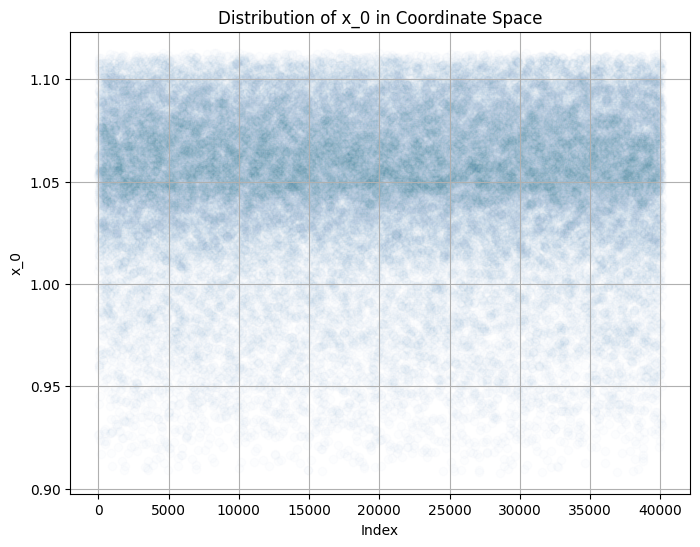

In [180]:
first_graph = feature_graph(train_data['x_0'], 'x_0')

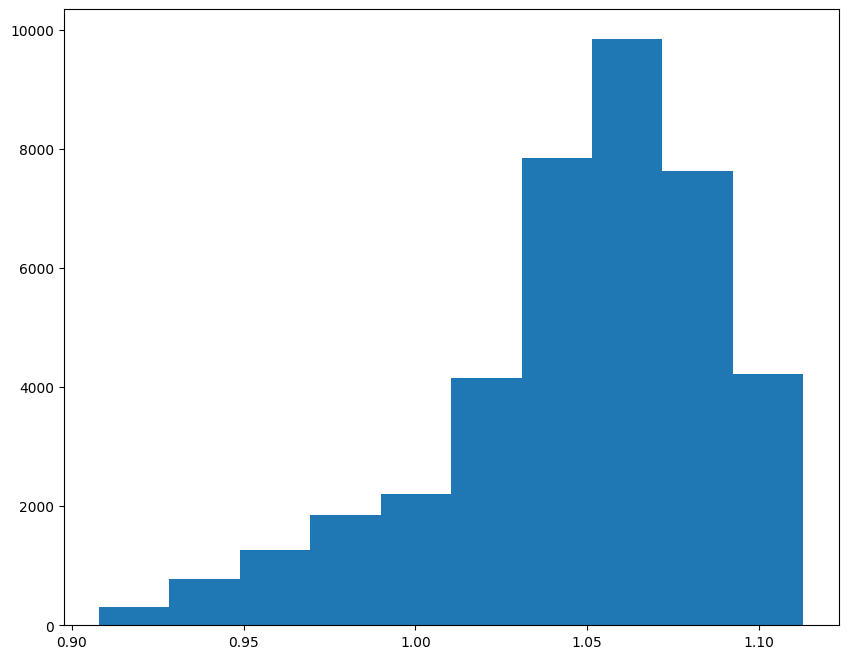

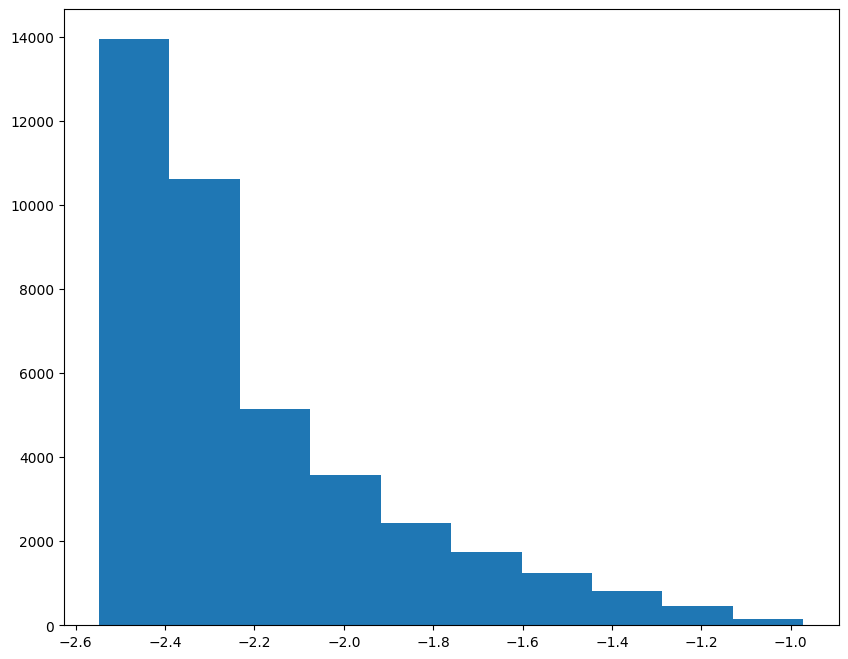

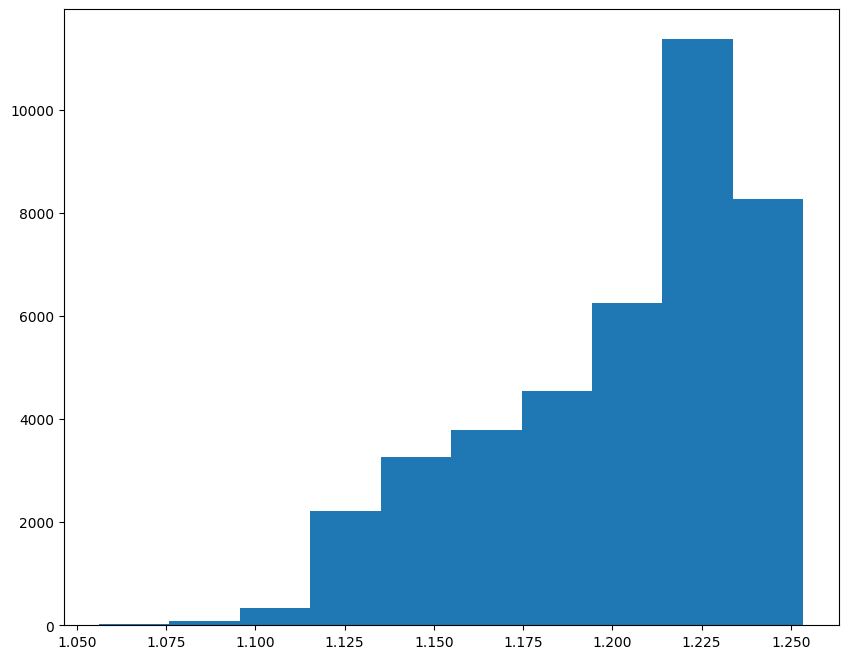

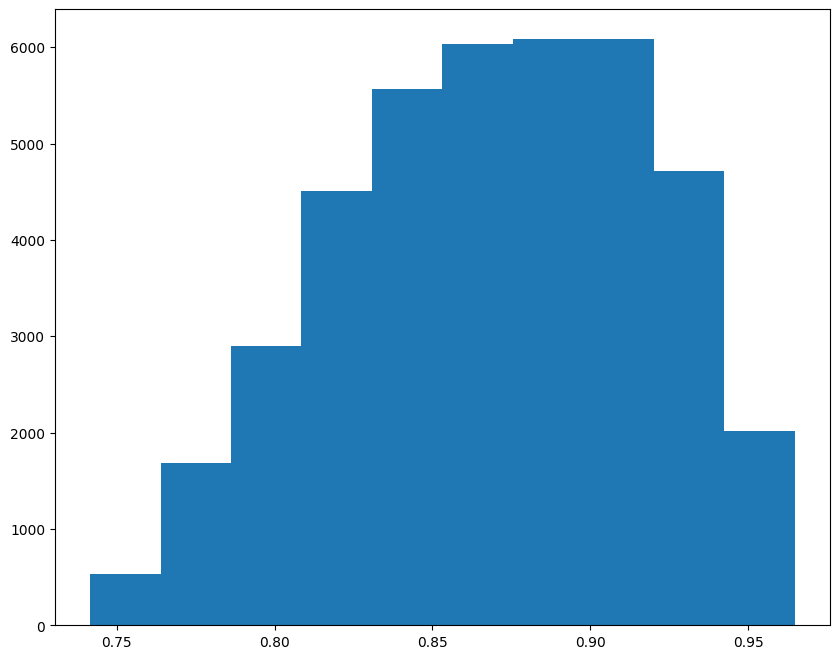

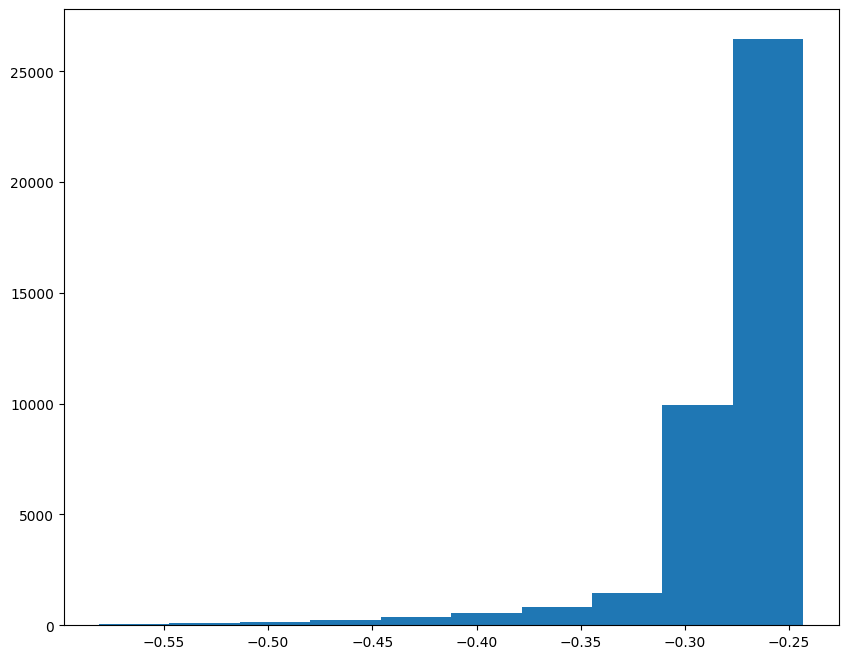

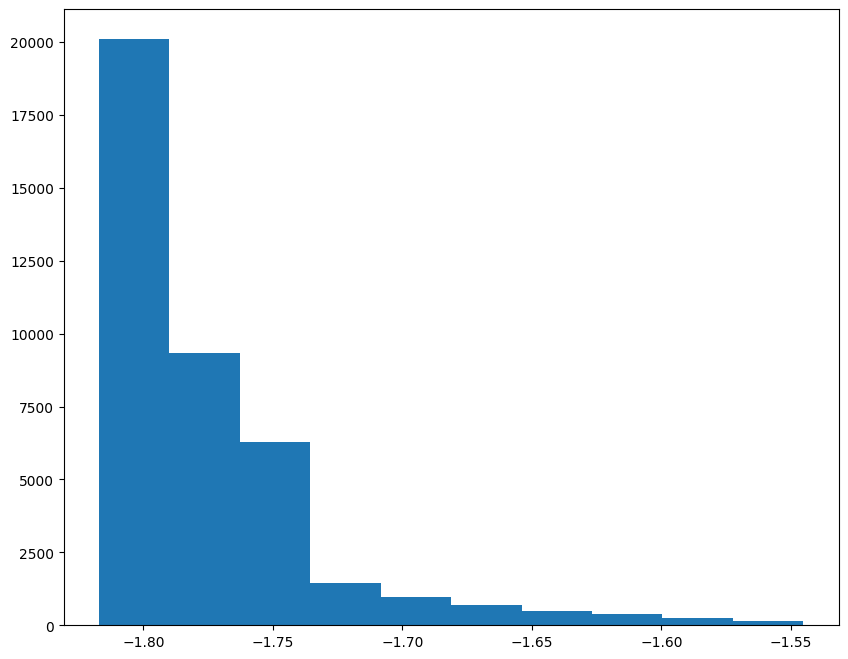

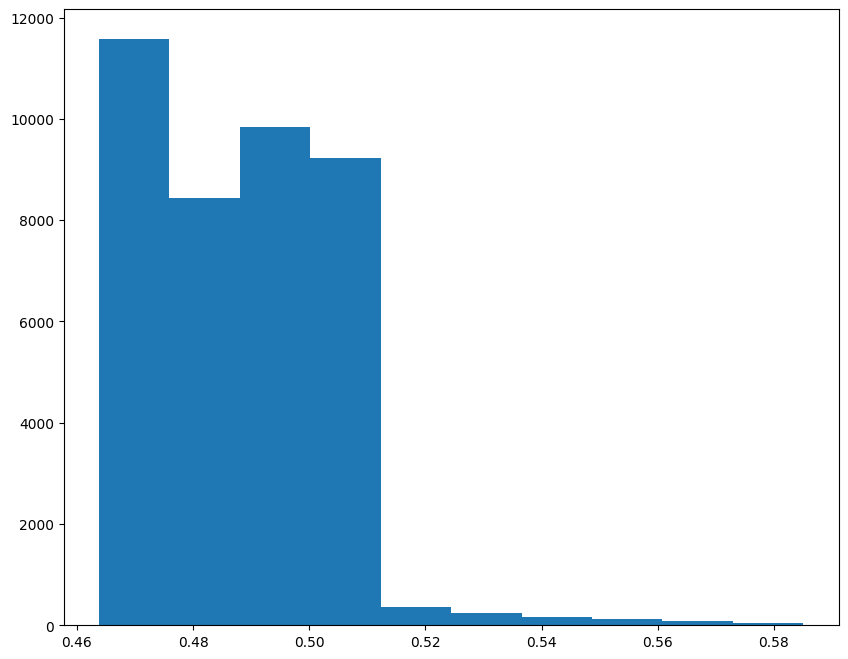

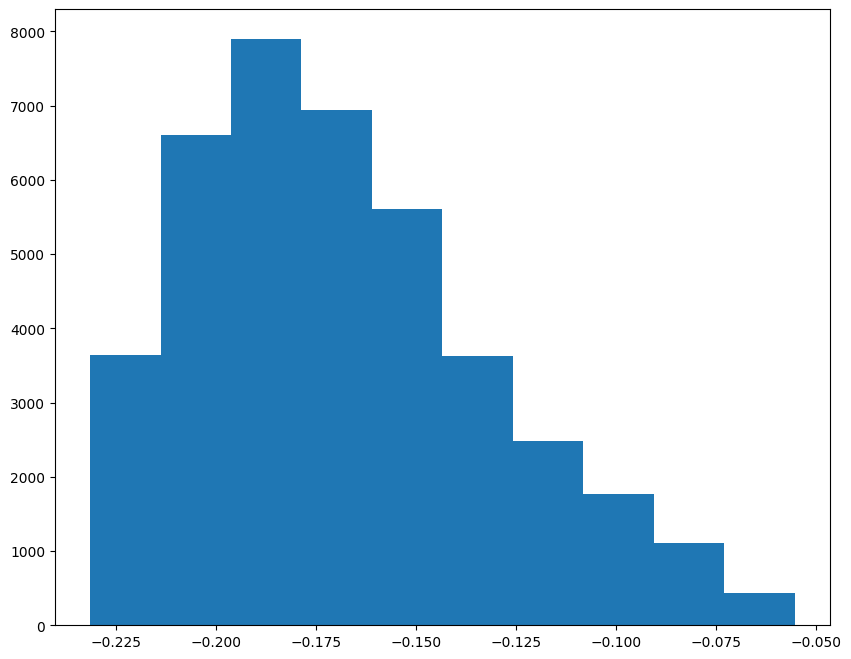

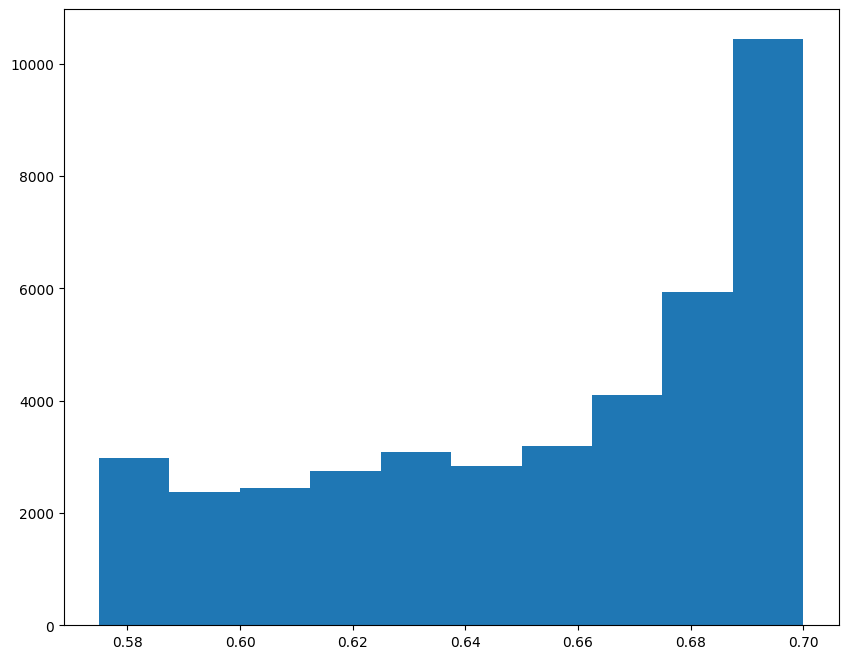

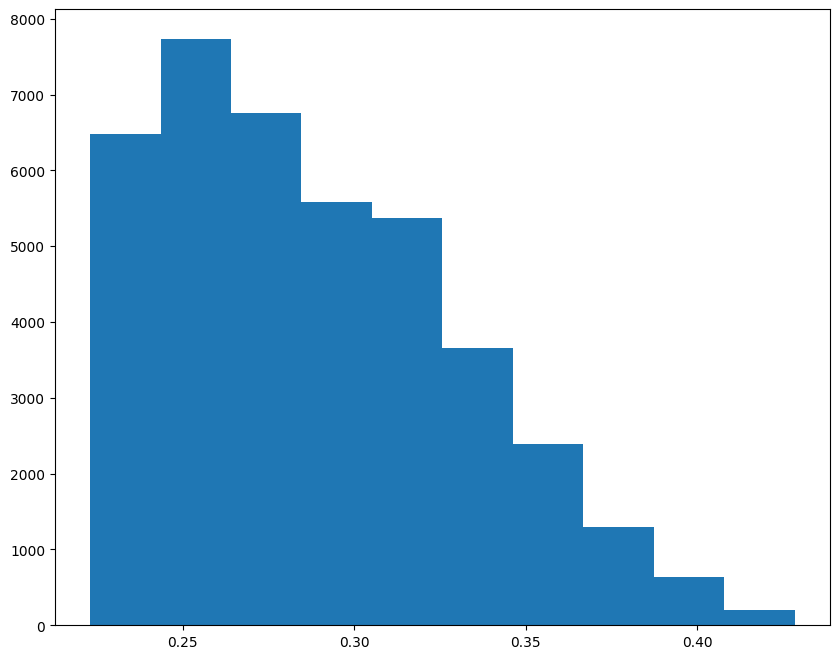

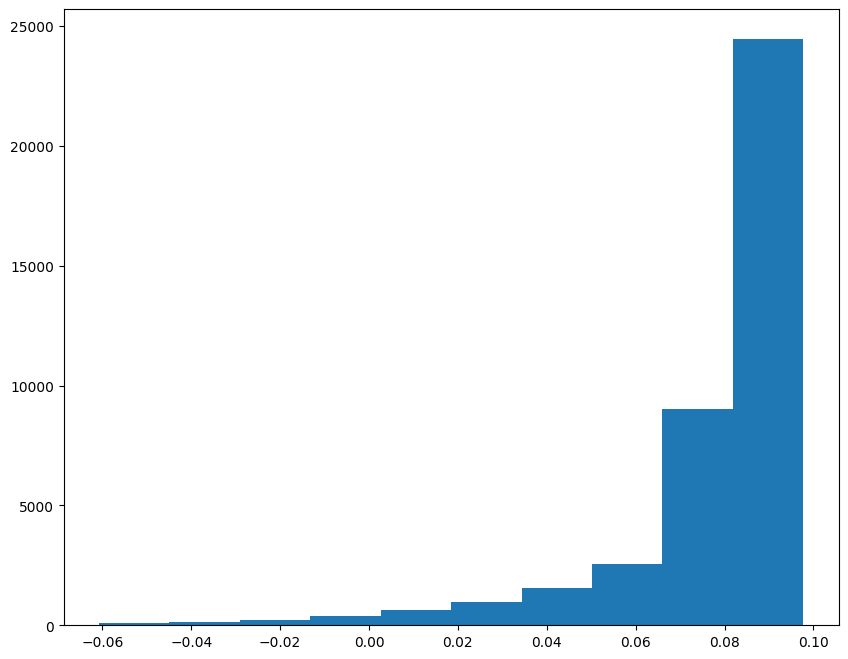

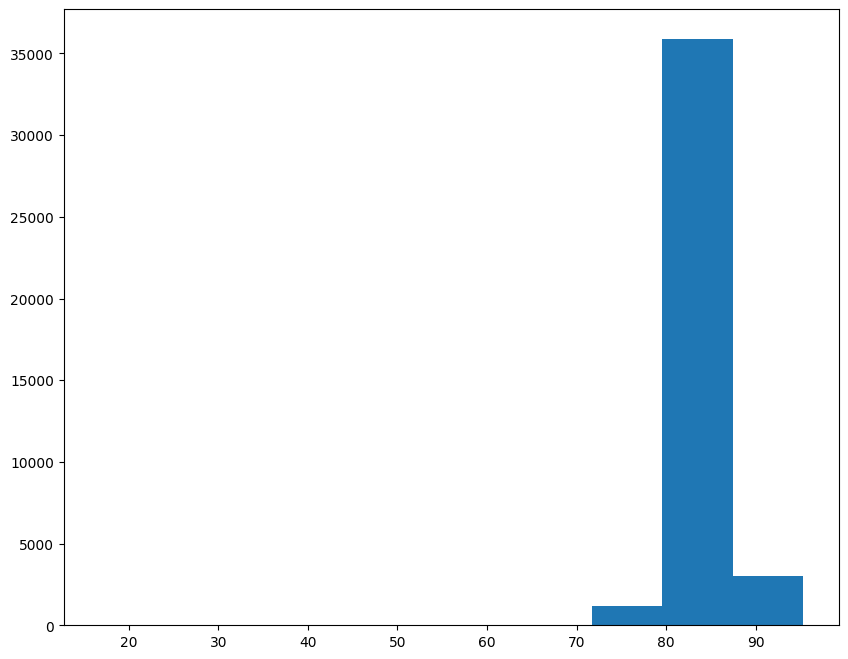

In [212]:
for col in train_data.columns:
    if col != 'ID':
        plt.figure(figsize=(10, 8))
        plt.hist(train_data[col])

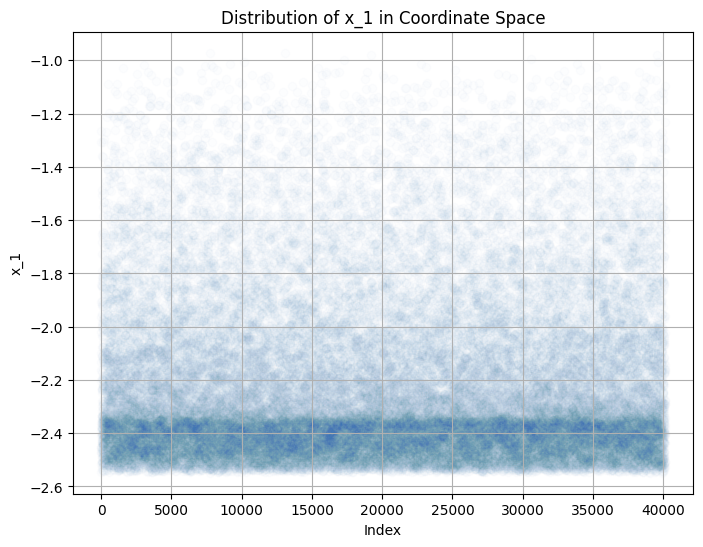

In [181]:
first_graph = feature_graph(train_data['x_1'], 'x_1')

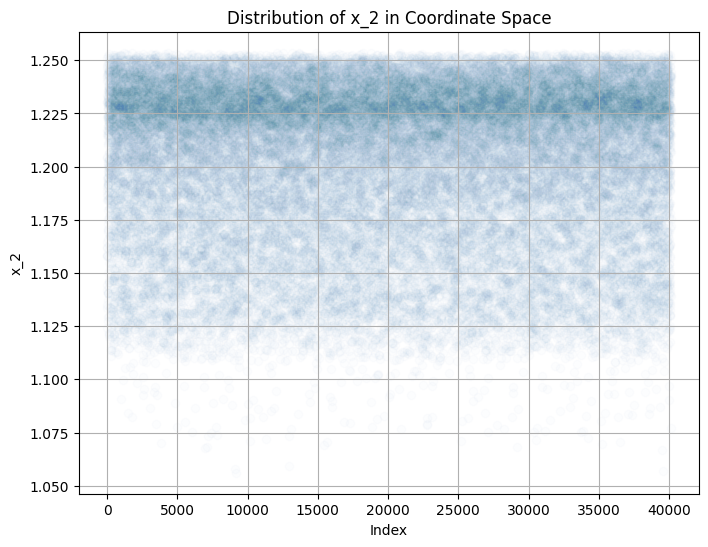

In [182]:
first_graph = feature_graph(train_data['x_2'], 'x_2')

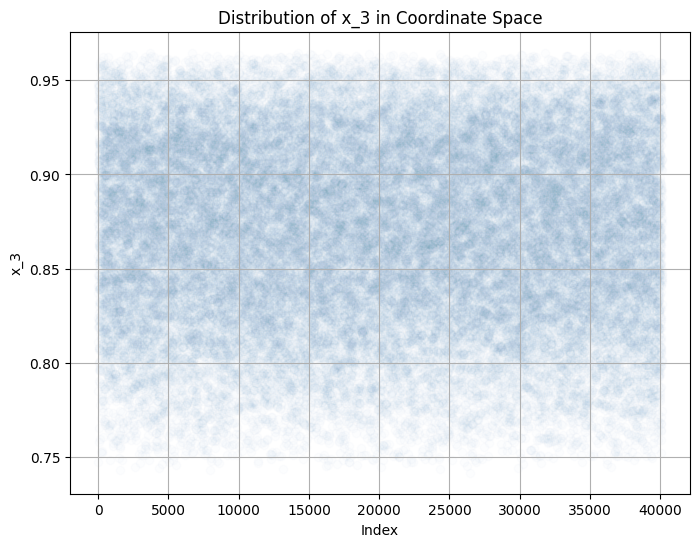

In [183]:
first_graph = feature_graph(train_data['x_3'], 'x_3')

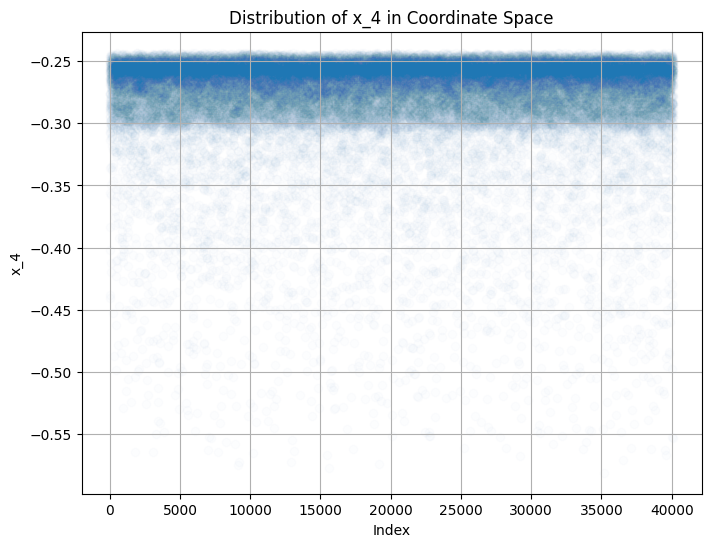

In [184]:
first_graph = feature_graph(train_data['x_4'], 'x_4')

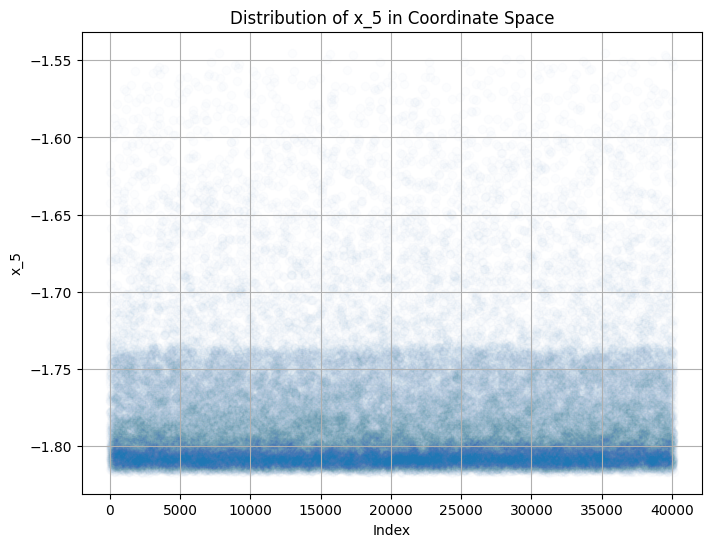

In [185]:
first_graph = feature_graph(train_data['x_5'], 'x_5')

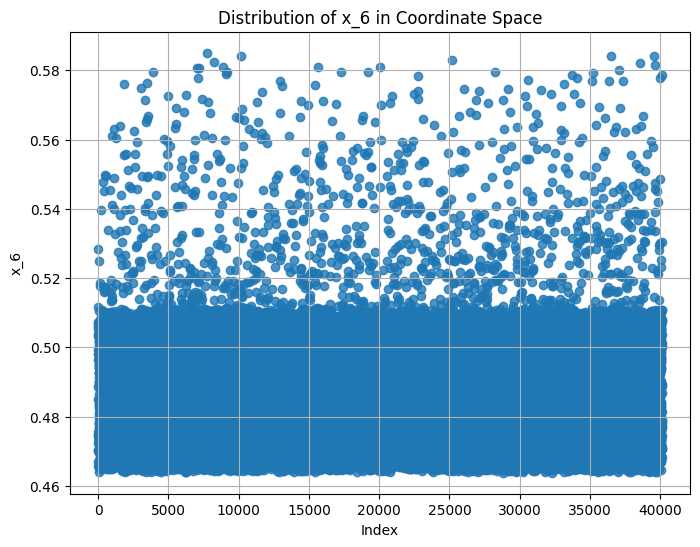

In [213]:
first_graph = feature_graph(train_data['x_6'], 'x_6')

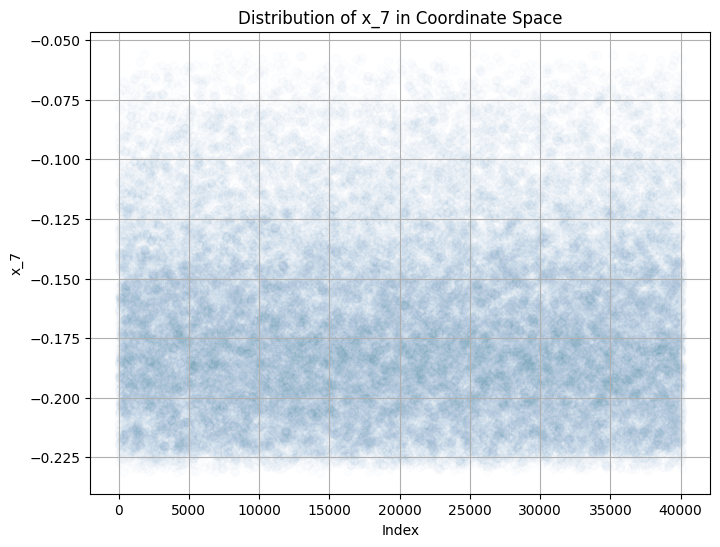

In [187]:
first_graph = feature_graph(train_data['x_7'], 'x_7')

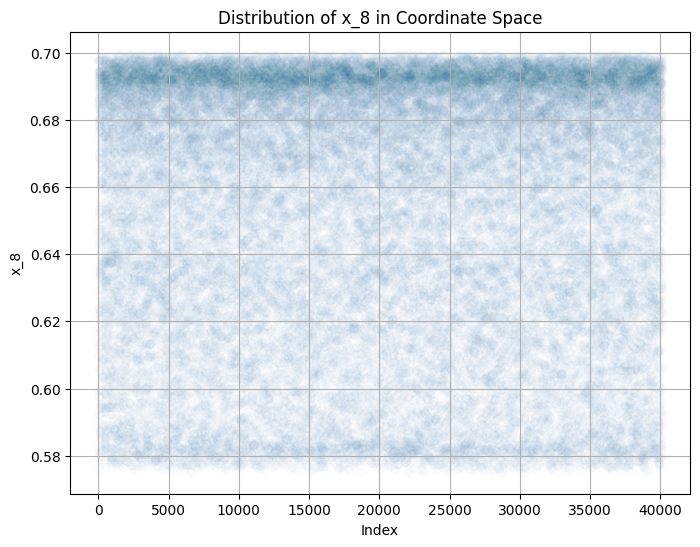

In [188]:
first_graph = feature_graph(train_data['x_8'], 'x_8')

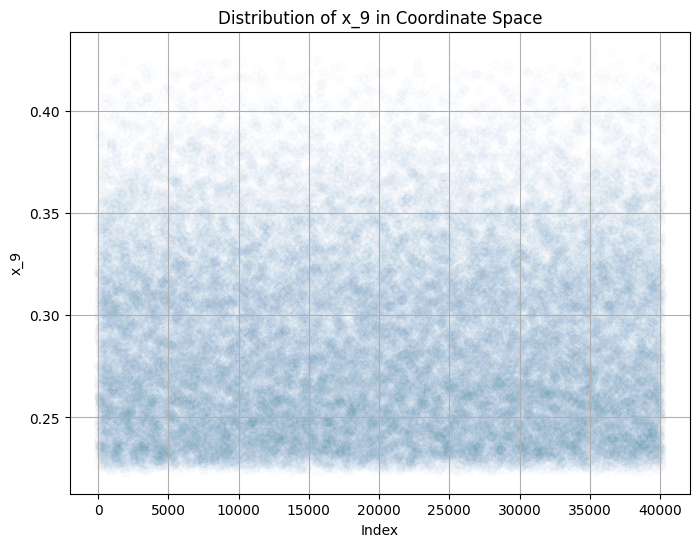

In [189]:
first_graph = feature_graph(train_data['x_9'], 'x_9')

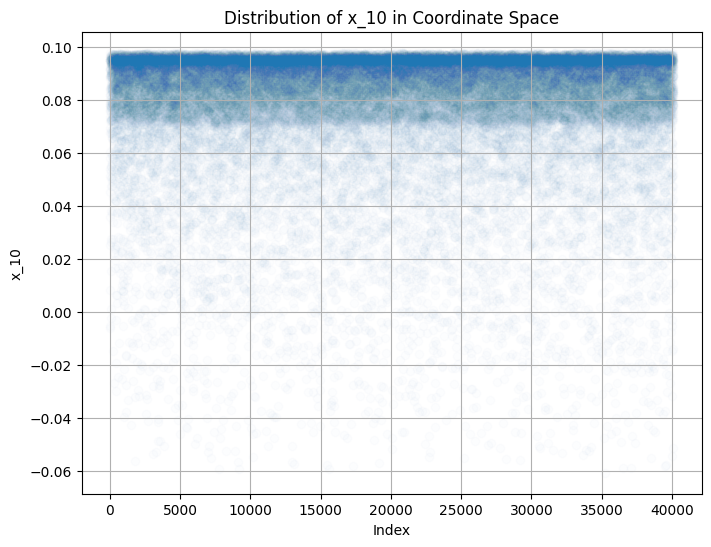

In [190]:
first_graph = feature_graph(train_data['x_10'], 'x_10')

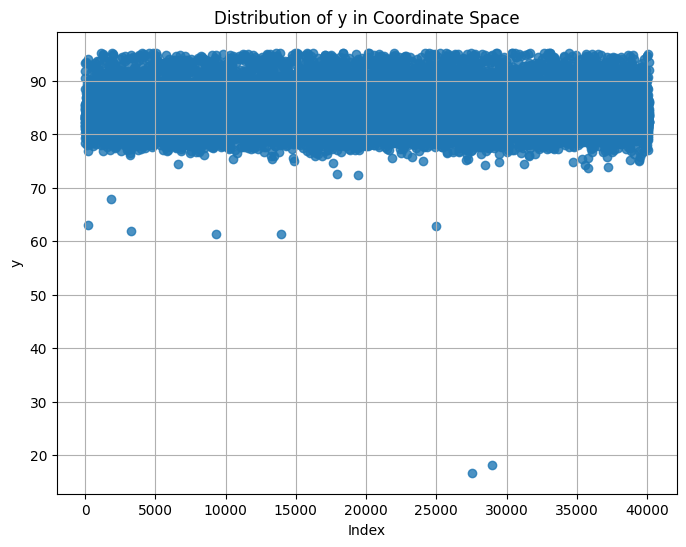

In [206]:
first_graph = feature_graph(train_data['y'], 'y')

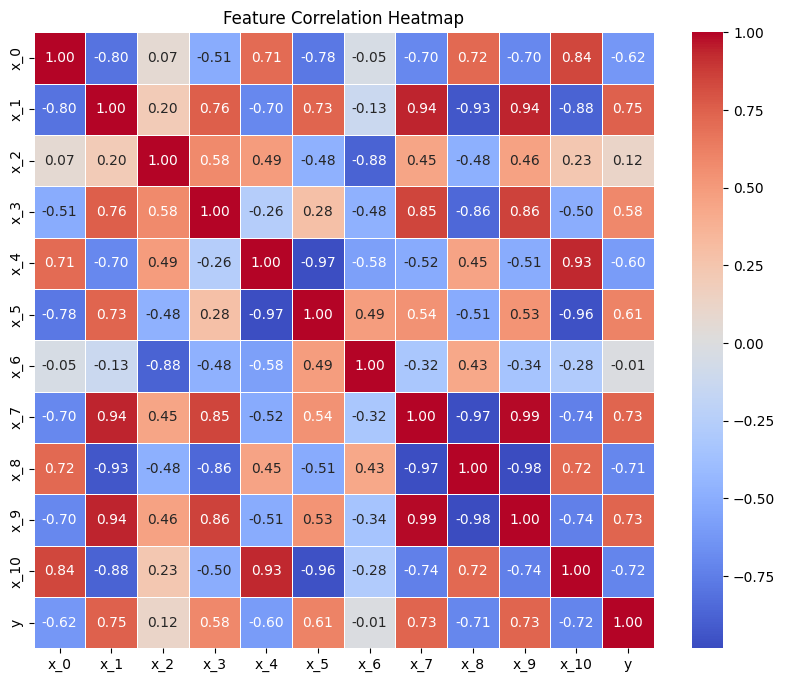

In [192]:
a = heatmap(train_data.iloc[:,1:])

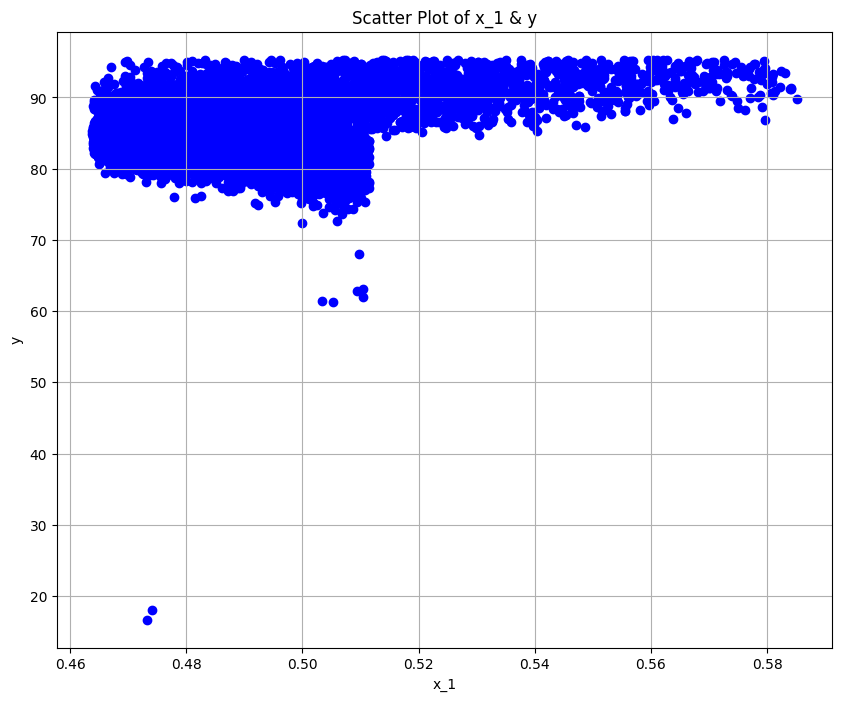

In [193]:
a = compare_two_column(train_data['x_6'], train_data['y'], 'x_1', 'y')

In [194]:
list = []

for i in range (100):
    list.append(i+1)

In [195]:
for col in train_data_cat.columns :
    if col == 'ID':
        continue
    elif col == 'y':
        continue
    else:
        train_data_cat[col] = pd.qcut(train_data_cat[col], q=100, labels=list)

In [196]:
quantile_value = train_data_cat['y'].quantile(0.9)

In [197]:
quantile_value

86.5388330078125

In [198]:
train_data_cat['y'] = train_data_cat['y'].apply(lambda x: 1 if x >= quantile_value else 0)

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

RANDOM_STATE = 110
THRESHOLD = 0.3


def objectiveCatBoost(trial, x_tr, y_tr, x_val, y_val):
    
    param = {
        'iterations': trial.suggest_int('iterations', 800, 5000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'depth': trial.suggest_int('depth', 4, 13),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 5),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10, log=True),
        'random_strength': trial.suggest_float('random_strength', 0, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 10),
        'border_count': trial.suggest_int('border_count', 128, 300),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        
        'random_seed': RANDOM_STATE,
        'eval_metric': 'F1',
        'logging_level': 'Silent',
        'boosting_type': 'Plain'
    }

    model = CatBoostClassifier(**param)
    model.fit(x_tr, y_tr)
    pred_proba = model.predict_proba(x_val)[:, 1]  # 양성 클래스 확률
    pred = (pred_proba >= THRESHOLD).astype(int)  # 스레드홀드에 따른 예측
    
    score = f1_score(y_val, pred, average="binary")
    
    return score

# 데이터셋 분할
x_train, x_val, y_train, y_val = train_test_split(
    train_data_cat.drop(["y","ID"], axis=1),  
    train_data_cat["y"],              
    test_size=0.2,
    shuffle=True,
    random_state=RANDOM_STATE,
)

# 하이퍼 파라미터 튜닝
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=RANDOM_STATE))
study.optimize(lambda trial: objectiveCatBoost(trial, x_train, y_train, x_val, y_val), n_trials=100)

print('Best trial: score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))


[I 2024-09-02 16:55:06,495] A new study created in memory with name: no-name-bc1df449-90d4-44ed-b2ce-7b84f07f5820
[W 2024-09-02 16:55:06,500] Trial 0 failed with parameters: {'iterations': 1287, 'learning_rate': 0.13203262096748453, 'depth': 7, 'min_data_in_leaf': 4, 'l2_leaf_reg': 4.780689663026719, 'random_strength': 6.824631292225899, 'bagging_temperature': 9.554598960277284, 'border_count': 238, 'scale_pos_weight': 5.61649246971856, 'grow_policy': 'Depthwise'} because of the following error: CatBoostError("features data: pandas.DataFrame column 'x_0' has dtype 'category' but is not in  cat_features list").
Traceback (most recent call last):
  File "/home/dinoboy22/.local/lib/python3.10/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_526/601787275.py", line 49, in <lambda>
    study.optimize(lambda trial: objectiveCatBoost(trial, x_train, y_train, x_val, y_val), n_trials=100)
  File "/tmp/ipykernel_526/601787

CatBoostError: features data: pandas.DataFrame column 'x_0' has dtype 'category' but is not in  cat_features list